<a href="https://colab.research.google.com/github/dongjun-kor/Python/blob/main/LSTM_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [716]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [717]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [718]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

#훈련 집합과 테스트 집합으로 분할
#split = int(len(X)*0.7)
#x_train= X[0:split]; y_train = Y[0:split]
#x_test= X[split:]; y_test = Y[split:]

In [719]:
#LSTM 모델 설계와 학습
#model=Sequential()
#model.add(LSTM(units=50, activation='relu', input_shape=x_train[0].shape))
#model.add(Dense(1))
#model.compile(loss='mae', optimizer='adam', metrics=['mae'])
#hist=model.fit(x_train,y_train, epochs=89, batch_size=1, validation_data=(x_test,y_test), verbose=1)

In [720]:
#LSTM 모델 평가
#ev=model.evaluate(x_test,y_test, verbose=0)
#print("손실 함수", ev[0], "MAE:",ev[1])

In [721]:
#LSTM 모델로 예측 수행
#pred=model.predict(x_test)
#print("평균 절댓값 백분율 오차(MAPE)", sum(abs(y_test-pred)/y_test)/len(x_test))



In [722]:
#학습 곡선
#plt.plot(hist.history['mae'])
#plt.plot(hist.history['val_mae'])
#plt.title('Model mae')
#plt.ylabel('mae')
#plt.xlabel('Epoch')
#plt.ylim([0, 300])
#plt.legend(['Train', 'Validation'],loc='best')
#plt.grid()
#plt.show()



In [723]:
#예측 결과 시각화
#x_range = range(len(y_test))
#plt.plot(x_range, y_test[x_range], color='red')
#plt.plot(x_range, pred[x_range], color='blue')
#plt.legend(['True prices', 'Predicted prices'], loc='best')
#plt.grid()
#plt.show()



In [724]:
#plt.plot(x_range, y_test[x_range], color='red')

In [725]:
#plt.plot(x_range, y_test[x_range], color='blue')

In [726]:
#일부 구간을 확대하여 시각화
#x_range = range(0,21)
#plt.plot(x_range, y_test[x_range], color='red')
#plt.plot(x_range, y_test[x_range], color='blue')
#plt.legend(['True prices', 'Predicted prices'], loc='best')
##plt.grid()
#plt.show()

여기는 다른거야

In [727]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [728]:
df=pd.read_csv("/content/drive/MyDrive/LSTMipc1.csv",parse_dates =["date"], index_col ="date", engine='python',encoding='euc-kr', dtype={'N':'float'})
df

,N
date,
2021-01-10,9.0
2021-02-10,8.0
2021-03-10,10.0
2021-04-10,10.0
2021-05-10,5.0
...,...
2000-08-10,4.0
2000-09-10,2.0
2000-10-10,2.0


In [729]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2021-01-10 to 2000-12-10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       260 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


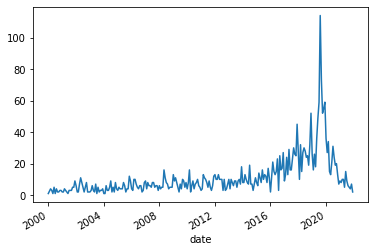

In [730]:
df['N'].plot()

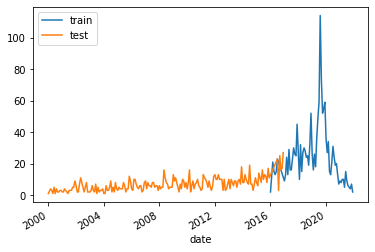

In [731]:
split_date = pd.Timestamp('2016-07-10')


train = df.loc[:split_date, ['N']]
test = df.loc[split_date:, ['N']]

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

train_sc

In [800]:
train_sc_df = pd.DataFrame(train, columns=['N'], index=train.index)
test_sc_df = pd.DataFrame(test, columns=['N'], index=test.index)
train_sc_df.head()

,N
date,
2021-01-10,9.0
2021-02-10,8.0
2021-03-10,10.0
2021-04-10,10.0
2021-05-10,5.0


In [801]:
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['N'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['N'].shift(s)

train_sc_df.head(13)

,N,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
date,,,,,,,,,,,,,
2021-01-10,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-10,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-10,10.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-10,10.0,10.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-10,5.0,10.0,10.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-10,15.0,5.0,10.0,10.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-10,9.0,15.0,5.0,10.0,10.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-10,6.0,9.0,15.0,5.0,10.0,10.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN
2021-09-10,5.0,6.0,9.0,15.0,5.0,10.0,10.0,8.0,9.0,NaN,NaN,NaN,NaN


In [802]:
X_train = train_sc_df.dropna().drop('N', axis=1)
y_train = train_sc_df.dropna()[['N']]

X_test = test_sc_df.dropna().drop('N', axis=1)
y_test = test_sc_df.dropna()[['N']]



X_train.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
date,,,,,,,,,,,,
2020-01-10,2.0,7.0,4.0,5.0,6.0,9.0,15.0,5.0,10.0,10.0,8.0,9.0
2020-02-10,36.0,2.0,7.0,4.0,5.0,6.0,9.0,15.0,5.0,10.0,10.0,8.0
2020-03-10,27.0,36.0,2.0,7.0,4.0,5.0,6.0,9.0,15.0,5.0,10.0,10.0
2020-04-10,34.0,27.0,36.0,2.0,7.0,4.0,5.0,6.0,9.0,15.0,5.0,10.0
2020-05-10,15.0,34.0,27.0,36.0,2.0,7.0,4.0,5.0,6.0,9.0,15.0,5.0


In [803]:
print(type(X_train))
X_train = X_train.values
print(type(X_train))
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values
print(X_train.shape)
#print(X_train)
print(y_train.shape)
#print(y_train)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(55, 12)
(55, 1)


In [804]:
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)

print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)

최종 DATA
(55, 12, 1)
[[[  2.]
  [  7.]
  [  4.]
  [  5.]
  [  6.]
  [  9.]
  [ 15.]
  [  5.]
  [ 10.]
  [ 10.]
  [  8.]
  [  9.]]

 [[ 36.]
  [  2.]
  [  7.]
  [  4.]
  [  5.]
  [  6.]
  [  9.]
  [ 15.]
  [  5.]
  [ 10.]
  [ 10.]
  [  8.]]

 [[ 27.]
  [ 36.]
  [  2.]
  [  7.]
  [  4.]
  [  5.]
  [  6.]
  [  9.]
  [ 15.]
  [  5.]
  [ 10.]
  [ 10.]]

 [[ 34.]
  [ 27.]
  [ 36.]
  [  2.]
  [  7.]
  [  4.]
  [  5.]
  [  6.]
  [  9.]
  [ 15.]
  [  5.]
  [ 10.]]

 [[ 15.]
  [ 34.]
  [ 27.]
  [ 36.]
  [  2.]
  [  7.]
  [  4.]
  [  5.]
  [  6.]
  [  9.]
  [ 15.]
  [  5.]]

 [[ 13.]
  [ 15.]
  [ 34.]
  [ 27.]
  [ 36.]
  [  2.]
  [  7.]
  [  4.]
  [  5.]
  [  6.]
  [  9.]
  [ 15.]]

 [[ 21.]
  [ 13.]
  [ 15.]
  [ 34.]
  [ 27.]
  [ 36.]
  [  2.]
  [  7.]
  [  4.]
  [  5.]
  [  6.]
  [  9.]]

 [[ 31.]
  [ 21.]
  [ 13.]
  [ 15.]
  [ 34.]
  [ 27.]
  [ 36.]
  [  2.]
  [  7.]
  [  4.]
  [  5.]
  [  6.]]

 [[ 24.]
  [ 31.]
  [ 21.]
  [ 13.]
  [ 15.]
  [ 34.]
  [ 27.]
  [ 36.]
  [  2.]
  [  7.]
  [  4.]
 

In [805]:
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping

K.clear_session()
    
model = Sequential() # Sequeatial Model 
model.add(LSTM(50,activation='relu', input_shape=(12, 1))) # (timestep, feature) 
model.add(Dense(1)) # output = 1 
model.compile(loss='mae', optimizer='adam',metrics=['mae']) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [806]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

h=model.fit(X_train_t, y_train, epochs=100,
          batch_size=50, verbose=1, callbacks=[early_stop])

Epoch 1/100
2/2 [==============================] - 1s 40ms/step - loss: 29.7349 - mae: 29.7349
Epoch 2/100
2/2 [==============================] - 0s 49ms/step - loss: 28.4006 - mae: 28.4006
Epoch 3/100
2/2 [==============================] - 0s 45ms/step - loss: 27.1603 - mae: 27.1603
Epoch 4/100
2/2 [==============================] - 0s 36ms/step - loss: 25.8286 - mae: 25.8286
Epoch 5/100
2/2 [==============================] - 0s 53ms/step - loss: 24.3684 - mae: 24.3684
Epoch 6/100
2/2 [==============================] - 0s 59ms/step - loss: 22.5620 - mae: 22.5620
Epoch 7/100
2/2 [==============================] - 0s 43ms/step - loss: 20.2967 - mae: 20.2967
Epoch 8/100
2/2 [==============================] - 0s 40ms/step - loss: 17.1536 - mae: 17.1536
Epoch 9/100
2/2 [==============================] - 0s 37ms/step - loss: 13.8583 - mae: 13.8583
Epoch 10/100
2/2 [==============================] - 0s 38ms/step - loss: 14.0731 - mae: 14.0731
Epoch 10: early stopping


In [807]:
score=model.evaluate(X_test_t,y_test,batch_size=50)
print(score)

4/4 [==============================] - 0s 7ms/step - loss: 3.3346 - mae: 3.3346
[3.334552049636841, 3.334552049636841]


In [741]:
print(X_test)

[[ 0.125       0.05357143  0.08035714 ...  0.20535714  0.00892857
   0.1875    ]
 [ 0.07142857  0.125       0.05357143 ...  0.125       0.20535714
   0.00892857]
 [ 0.09821429  0.07142857  0.125      ...  0.13392857  0.125
   0.20535714]
 ...
 [ 0.          0.01785714 -0.00892857 ...  0.02678571  0.02678571
   0.00892857]
 [ 0.          0.          0.01785714 ...  0.0625      0.02678571
   0.02678571]
 [ 0.00892857  0.          0.         ... -0.00892857  0.0625
   0.02678571]]


In [742]:
train_sc_df.describe()

,N,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
count,67.000000,66.000000,65.000000,64.000000,63.000000,62.000000,61.000000,60.000000,59.000000,58.000000,57.000000,56.000000,55.000000
mean,0.198561,0.198728,0.200000,0.201590,0.202948,0.203485,0.205357,0.208780,0.205811,0.205819,0.205670,0.204879,0.205195
std,0.167544,0.168823,0.169818,0.170671,0.171694,0.173042,0.173844,0.173226,0.173167,0.174679,0.176228,0.177721,0.179343
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.098214,0.098214,0.098214,0.095982,0.093750,0.091518,0.098214,0.098214,0.098214,0.098214,0.098214,0.091518,0.084821
50%,0.169643,0.165179,0.169643,0.169643,0.169643,0.178571,0.187500,0.191964,0.187500,0.178571,0.169643,0.165179,0.160714
75%,0.245536,0.247768,0.250000,0.250000,0.250000,0.250000,0.250000,0.252232,0.250000,0.250000,0.250000,0.252232,0.254464
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [743]:
test_sc_df.describe()

,N,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
count,194.000000,193.000000,192.000000,191.000000,190.000000,189.000000,188.000000,187.000000,186.000000,185.000000,184.000000,183.000000,182.000000
mean,0.043216,0.043394,0.043573,0.043801,0.044032,0.044170,0.044453,0.044547,0.044835,0.045029,0.045177,0.045472,0.045379
std,0.039409,0.039434,0.039458,0.039434,0.039409,0.039468,0.039381,0.039465,0.039375,0.039393,0.039449,0.039352,0.039440
min,-0.008929,-0.008929,-0.008929,-0.008929,-0.008929,-0.008929,-0.008929,-0.008929,-0.008929,-0.008929,-0.008929,-0.008929,-0.008929
25%,0.017857,0.017857,0.017857,0.017857,0.017857,0.017857,0.017857,0.017857,0.017857,0.017857,0.017857,0.017857,0.017857
50%,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714
75%,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500
max,0.223214,0.223214,0.223214,0.223214,0.223214,0.223214,0.223214,0.223214,0.223214,0.223214,0.223214,0.223214,0.223214


Text(0.5, 1.0, 'Prices vs Predicted price Index: $Y_i$ vs $\\hat{Y}_i$')

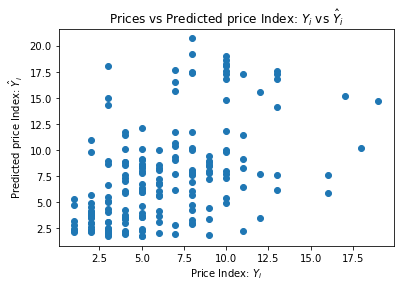

In [808]:
%matplotlib inline
import matplotlib.pyplot as plt


y_pred = model.predict(X_test_t, batch_size=50)
plt.scatter(y_test, y_pred)
plt.xlabel("Price Index: $Y_i$")
plt.ylabel("Predicted price Index: $\hat{Y}_i$")
plt.title("Prices vs Predicted price Index: $Y_i$ vs $\hat{Y}_i$")

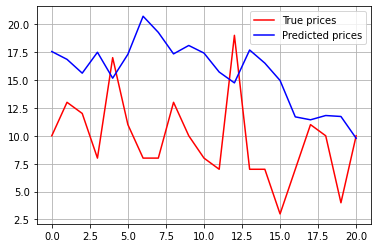

In [809]:
x_range = range(0,21)
plt.plot(x_range, y_test[x_range], color='red')
plt.plot(x_range, y_pred[x_range], color='blue')
plt.legend(['True prices', 'Predicted prices'], loc='best')
plt.grid()
plt.show()

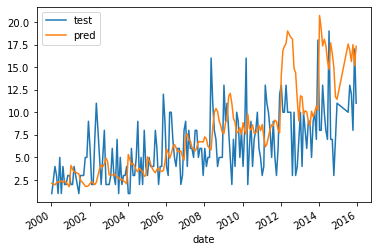

In [810]:
t_df=test_sc_df.dropna()
y_test_df=pd.DataFrame(y_test, columns=['N'], index=t_df.index)
y_pred_df=pd.DataFrame(y_pred, columns=['N'], index=t_df.index)

ax1=y_test_df.plot()
y_pred_df.plot(ax=ax1)
plt.legend(['test','pred'])

In [812]:
nFuture = 10
nStep = 110

if len(df['N']) > 100:

    lastData = np.copy(df[-250:])  # 원 데이터의 마지막 100개만 그려본다

else:

    lastData = np.copy(df)

    

dx = np.copy(lastData)

estimate = [dx[-1]]

for i in range(nFuture):

    # 마지막 nStep 만큼 입력데이로 다음 값을 예측한다

    px = dx[-nStep:].reshape(1, nStep, 1)

    

    # 다음 값을 예측한다.

    yHat = model.predict(px)[0][0]

        

    # 예측값을 저장해 둔다

    estimate.append(yHat)

    

    # 이전 예측값을 포함하여 또 다음 값을 예측하기위해 예측한 값을 저장해 둔다

    dx = np.insert(dx, len(dx), yHat)


In [ ]:
plt.plot(ax1, lastData, 'b-o', color='blue', markersize=3, label='Time series', linewidth=1)

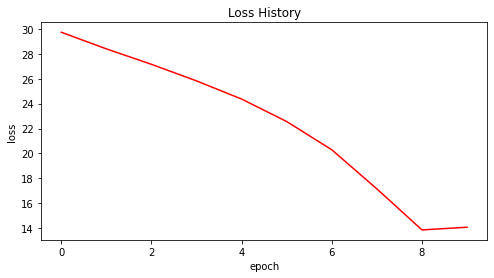

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


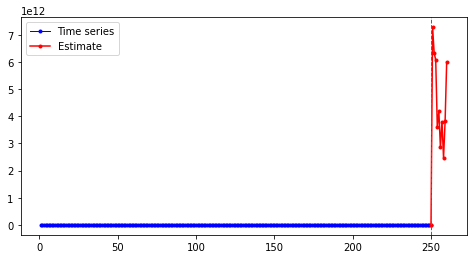

In [813]:
# Loss history를 그린다

plt.figure(figsize=(8, 4))

plt.plot(h.history['loss'], color='red')

plt.title("Loss History")

plt.xlabel("epoch")

plt.ylabel("loss")

plt.show()



# 원 시계열과 예측된 시계열을 그린다

ax1 = np.arange(1, len(lastData) + 1)

ax2 = np.arange(len(lastData), len(lastData) + len(estimate))

plt.figure(figsize=(8, 4))

plt.plot(ax1, lastData, 'b-o', color='blue', markersize=3, label='Time series', linewidth=1)

plt.plot(ax2, estimate, 'b-o', color='red', markersize=3, label='Estimate')

plt.axvline(x=ax1[-1],  linestyle='dashed', linewidth=1)

plt.legend()

plt.show()